In [1]:
# 매 강의 시작시마다 동일하게 처리해야 함
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:13pt;
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:15px;
</style>
"""))

<b><font size="5" color="red">ch10. N차원 배열 다루기</font></b>

- [numpy](https://pypi.org/project/numpy/)
- [numpy_API](https://numpy.org/doc/stable/reference/index.html)
- [myWebsite](http://alan.waggu.net)
- N차원 배열 객체
- 2차원 배열은 행렬 개념
- numpy 패키지는 c언어로 구현되어 고성능 수치 계산 패키지

# 1절. 넘파이 패키지

In [7]:
import numpy as np

np.__version__

'1.23.5'

In [8]:
# np.arrange(from, stop, step) : fron부터 stop까지 step씩 증감한 정수값을 배열로 생성
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열속성

In [17]:
from numpy import arange
a = arange(15).reshape(3, 5) # 3행 5열짜리 2차원 배열로 return
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [18]:
type(a) # a 변수의 타입

numpy.ndarray

In [19]:
a.dtype # a배열 요소의 type

dtype('int32')

In [20]:
a.itemsize # 한 요소의 byte사이즈


4

In [22]:
a.ndim #차원수(축수)

2

In [23]:
a.size # 배열 요소의 갯수


15

In [24]:
a.shape #배열의 구조 (튜플)

(3, 5)

## 1.2 배열 변경(구조, 타입)

In [26]:
# 구조 변경

print('구조변경 전', a, sep='\n')
a.shape  = (5, 3)
print('구조변경 후', a, sep='\n')

구조변경 전
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [28]:
# 타입변경
a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [30]:
a.dtype

dtype('int32')

In [32]:
a.itemsize

4

In [34]:
a.dtype = np.int64 # a배열을 읽을 때 64bit씩 읽는다.
a.dtype

dtype('int64')

In [35]:
a.itemsize

8

In [37]:
a.size, a.shape # 12개 요소 3행 4열

(6, (3, 2))

In [38]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [50]:
# 타입변경(O)
a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [42]:
a = astype(np.int64)
a

NameError: name 'astype' is not defined

In [51]:
a = a.astype(np.int64) # a.astype('int64')
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [52]:
a.dtype

dtype('int64')

In [53]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [54]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장

In [ ]:
# 배열저장 pkl npy
# 딥러닝모델 저장 h5 keras
# 머신러닝 모델 저장 pkl joblib

In [49]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [56]:
import pickle
with open('data/ch10_a.pkl', 'wb') as f:
    pickle.dump(a,f)
with open('data/ch10_a.pkl', 'rb') as f:
    load_a = pickle.load(f)

In [57]:
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [58]:
np.all(a == load_a) # a넘파이 배열과 load_a 넘파이 배열이 같은지

True

In [59]:
np.save('data/ch10_a.npy', a)

In [61]:
load_a2 = np.load('data/ch10_a.npy')
np.all(load_a2==a)

True

# 2절. 넘파이 배열
- array()함수를 : 다른 파이썬 데이터 구조를 배열로 변환
- arange(), ones(), zeros(), empty()
- random값을 갖는 함수들...
## 2.1 array() 함수로 넘파이 배열 만들기
array(list나 tuple, dtype=np.xxxx, copy=T/F)

In [66]:
a = np.array([2., 4, 6]) # 정수의 기본 타입은 int32 / 실수의 기본 타입은 float64
a

array([2., 4., 6.])

In [67]:
a = np.array(['2', 4, 6]) # 문자가 들어가면 전부 문자로 바뀜
a

array(['2', '4', '6'], dtype='<U11')

In [74]:
a = np.array([2, 4, 6])
a

array([2, 4, 6])

In [75]:
a[0], a[1], a[2]

(2, 4, 6)

In [82]:
a.dtype

dtype('int32')

In [86]:
b = np.array([[1.3, 2.4],[4,5]], dtype=np.float32).reshape(1,4)
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [87]:
b.itemsize

4

In [88]:
b.astype(np.float64)

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [92]:
l = [[1,2], [3.4, 4.5]]
for row in l:
    for data in row:
        print(data, end='\t')
    print()
        

1	2	
3.4	4.5	


In [98]:
c = np.array([[1,2], [3.4,4.5]], dtype=np.float16)
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print("{}행{}duf:{}".format(i,j,item), end='\t')
    print()

0행0duf:1.0	0행1duf:2.0	
1행0duf:3.400390625	1행1duf:4.5	


In [103]:
c = np.array([[1,2,3,4,5],[6,7,8,9,10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [104]:
c[0,3]

4

In [105]:
c[:,1:3]

array([[2, 3],
       [7, 8]], dtype=int16)

In [111]:
c[0, 2:]
c[0, 2:5]


array([3, 4, 5], dtype=int16)

In [115]:
# 모든 행의 맨 마지막 열만 추출

c[:,-1]

# 모든 행의 맨 마지막 열을 제외한 추출

c[:,:-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [119]:
c = np.array([[1, 2],[3, 4]])
d = np.array(c, copy=False) # d=c 얕은 복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소={}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[   1    2]
 [3333    4]]
d=
[[   1    2]
 [3333    4]]
c주소=1915739374672, d주소=1915739374672


In [120]:
c = np.array([[1, 2],[3, 4]])
d = np.array(c, copy=True) # d=c.copy() 얕은 복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소={}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
c주소=1915658145296, d주소=1915658151248


## 2.2 기본값이 있는 배열 만들기
- np.zeros( tup ) : 요소들이 다 0
- np.zeros( tup ) : 요소들이 다 1
- np.full(  tup, 기본값) : 요소들이 다 기본값
- np.empty( tup ) : 요소들이 임의의 값(메모리 상태에 따라 달라짐)
    ※ 위의 함수를 이용해서 생성된 배열은 dtype이 aloat64. dtype 속성 따라 지정 가능

In [125]:
np.zeros( (3, 5), dtype=np.int8)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int8)

In [126]:
x = np.ones((3,5))
x.dtype, x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [129]:
np.full((2, 5), -256)

array([[-256, -256, -256, -256, -256],
       [-256, -256, -256, -256, -256]])

In [136]:
np.empty((2, 5))

array([[6.23042070e-307, 4.67296746e-307, 1.69121096e-306,
        1.29061074e-306, 1.89146896e-307],
       [7.56571288e-307, 3.11525958e-307, 1.24610723e-306,
        1.29061142e-306, 5.53353523e-322]])

## 2.3 랜덤값을 갖는 배열 만들기
- np.random.random(tup) : 0부터 1 미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low=0, hight=1.0, size=tup): low부터 hight미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0, scale=1.0, size=tup): 평균 loc과 표준편차 scale을 갖는 정규 분포 랜담값
- np.random.rand(n) : 균등본포의 1차원 난수 배열 발생(난수 n개)
- np.random.rand(n) : 표준정규분포(평균 0,표준편차 1인 정규분포)의 1차원 난수 배열 발생(난수 n개)

cf. np.random.randint(n) : 0부터 n미만의 정수 난수 1개 발생

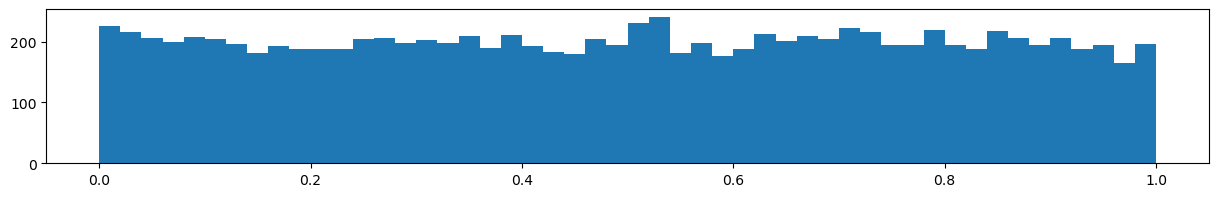

In [141]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
np.random.rand(100)
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로, 세로)
plt.hist(x, bins=50)
plt.show()

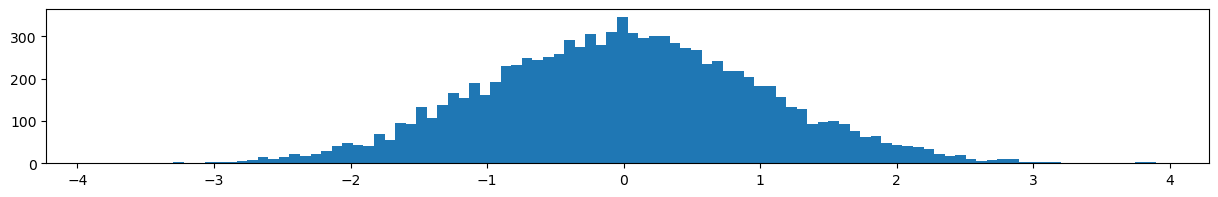

In [143]:
x = np.random.randn(10000)
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로, 세로)
plt.hist(x, bins=100)
plt.show()

In [148]:
# 2차원 난수 배열
np.random.seed(12) # seed값을 맞추면 발새되는 난수 순서가 동일
np.random.random( (2,5)) # 0 부터 1미만 균등분포 난수 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [149]:
np.random.uniform(-1, 10, (2, 5)) # -1 ~ 10미만의 균등분포 난수 배열

array([[ 2.12211188,  5.66691503,  9.3864765 ,  8.38009095, -0.97514843],
       [ 4.7334863 ,  5.07241397,  4.33915155,  7.44947569,  0.76788428]])

In [152]:
np.random.normal(10, 2, (2, 5)) # 평균 10, 표준편자 2인 정규뷴포 난수 배열

array([[ 7.5696624 , 12.68471274,  9.75570042, 12.02503095,  8.17226171],
       [ 7.94093959, 12.4195929 , 11.00374461, 10.27769235, 11.28152223]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from,stop, by, dtype) : from부터 stop 앞까지 by씩 증감하는 정수 배열
- np.linspace(from, to, count) : from부터 to까지(to포함) count개 숫자를 1차원 배열

In [154]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [155]:
0.21052632-0.10526316

0.10526316

In [157]:
# linspace 는 많은 수의 점들을 생성
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)


array([0.        , 0.00628947, 0.01257895, 0.01886842, 0.0251579 ,
       0.03144737, 0.03773685, 0.04402632, 0.0503158 , 0.05660527,
       0.06289475, 0.06918422, 0.0754737 , 0.08176317, 0.08805265,
       0.09434212, 0.1006316 , 0.10692107, 0.11321055, 0.11950002,
       0.1257895 , 0.13207897, 0.13836845, 0.14465792, 0.15094739,
       0.15723687, 0.16352634, 0.16981582, 0.17610529, 0.18239477,
       0.18868424, 0.19497372, 0.20126319, 0.20755267, 0.21384214,
       0.22013162, 0.22642109, 0.23271057, 0.23900004, 0.24528952,
       0.25157899, 0.25786847, 0.26415794, 0.27044742, 0.27673689,
       0.28302637, 0.28931584, 0.29560531, 0.30189479, 0.30818426,
       0.31447374, 0.32076321, 0.32705269, 0.33334216, 0.33963164,
       0.34592111, 0.35221059, 0.35850006, 0.36478954, 0.37107901,
       0.37736849, 0.38365796, 0.38994744, 0.39623691, 0.40252639,
       0.40881586, 0.41510534, 0.42139481, 0.42768429, 0.43397376,
       0.44026323, 0.44655271, 0.45284218, 0.45913166, 0.46542

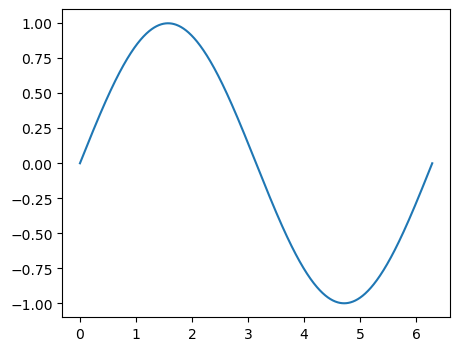

In [161]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.plot(x, y)
plt.show()


In [162]:
np.linspace(0, 2, 20).reshape(2, 10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [164]:
np.arange(10, 30, 3, dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

In [84]:
# 250425

## 2.5 배열의 차원 변경하기
- reshape([면수,] 행수, 열수) : -1이 올 수도
- resize([면수,] 행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환
※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열 수정됨

In [20]:
a = np.random.random( (2, 3))
a

array([[0.58959298, 0.19120009, 0.36300023],
       [0.99915596, 0.56337649, 0.34759104]])

In [21]:
a = np.round(a * 10)  # round : 반오림 / floor : 내림 / ceil : 올림
a 

array([[ 6.,  2.,  4.],
       [10.,  6.,  3.]])

In [22]:
a.reshape(3, 2)

array([[ 6.,  2.],
       [ 4., 10.],
       [ 6.,  3.]])

In [24]:
a.reshape(2, -1) # -1이 주어지면 해당 차원의 크기가 자동 계산 

array([[ 6.,  2.,  4.],
       [10.,  6.,  3.]])

In [25]:
a.reshape(-11, 1)

array([[ 6.],
       [ 2.],
       [ 4.],
       [10.],
       [ 6.],
       [ 3.]])

In [26]:
a.resize( (2,3)) # 결과를 출력하지 않는 함수는 배열을 바꿈 -1불가
a

array([[ 6.,  2.,  4.],
       [10.,  6.,  3.]])

In [ ]:
# 복습

In [5]:
import numpy as np
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr.dtype, arr.shape, arr.ndim, arr.size, arr.itemsize)
arr

int32 (2, 3) 2 6 4


array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
a = np.array([1, 2, 3])
b = np.array([[1,2,3],[4,5,6]]).reshape(3, 2)
a,b

(array([1, 2, 3]),
 array([[1, 2],
        [3, 4],
        [5, 6]]))

In [6]:
np.ones((2, 3))  # [[1. 1. 1.], [1. 1. 1.]]
np.zeros((2, 3)) # [[0. 0. 0.], [0. 0. 0.]]

array([[0., 0., 0.],
       [0., 0., 0.]])

In [7]:
np.full((2, 2), 7)  # [[7 7], [7 7]]

array([[7, 7],
       [7, 7]])

In [8]:
np.empty((2, 2))  # [[~, ~], [~, ~]]

array([[0.00000000e+000, 8.96365528e-312],
       [8.96365527e-312, 8.96365528e-312]])

In [9]:
np.random.random((2, 2))

array([[0.87717549, 0.58031619],
       [0.77122038, 0.60774706]])

In [10]:
np.random.uniform(10, 20, (2, 2))

array([[18.78870217, 14.11783505],
       [13.33530422, 18.39505759]])

In [11]:
np.random.normal(0, 1, (2, 3)) 

array([[-0.19271943, -0.91002422,  1.53786326],
       [-0.07906897, -1.4172166 ,  0.09867659]])

In [12]:
np.random.rand(5)    # [0.2 0.6 0.9 ...]
np.random.randn(5)   # [-1.1  0.3  0.9 ...]

array([ 1.89379887, -0.35097286, -0.52824494, -0.34498666,  0.49146515])

In [13]:
np.linspace(0, 1, 5)  # [0.   0.25 0.5  0.75 1.  ]

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [14]:
np.arange(1, 10, 2)  # [1 3 5 7 9]

array([1, 3, 5, 7, 9])

In [15]:
a = np.array([[1, 2], [3, 4]])
a.reshape(4,)       # [1 2 3 4]
a.ravel()           # [1 2 3 4]
a.flatten()         # [1 2 3 4]

array([1, 2, 3, 4])

In [ ]:
# == 복습 요까지 ==

In [17]:
import seaborn as sns
sns.load_dataset('iris')[::25]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica
125,7.2,3.2,6.0,1.8,virginica


In [2]:
import numpy as np

In [27]:
a.T # 전치행렬(행과 열이 뒤바뀐 행렬)

array([[ 6., 10.],
       [ 2.,  6.],
       [ 4.,  3.]])

In [29]:
a.transpose() # 전치행렬 a.T 와  동일함

array([[ 6., 10.],
       [ 2.,  6.],
       [ 4.,  3.]])

## 2.6 배열 인쇄

In [33]:
np.arange(1001)

array([   0,    1,    2, ...,  998,  999, 1000])

In [34]:
## 배열이 커서 출력이 안될 경우
print(np.arange(1001))

[   0    1    2 ...  998  999 1000]


In [35]:
# np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [43]:
# 배열 출력 옵션 변경(인쇄할 사이즈를 10000, 최대치, 무한대 변경)
import sys # 최대치 : sys.maxsize
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=np.inf) # 무한대 그러나 잘 사용하지 않고 위에 maxsize를 많이 씀
# 커널 재시작시 thershold값 복귀

In [42]:
sys.maxsize

9223372036854775807

## 2.7 기본 연산 동작
### 1) 배열

In [48]:
l = [1,2,3]
l * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [52]:
l = np.array([1,2,3])
n = 3
l*3

array([3, 6, 9])

In [3]:
a = np.array([10, 20, 30, 40], dtype=np.int8)
b = np.arange(4)
print(a, a.dtype)
print(b, b.dtype)

[10 20 30 40] int8
[0 1 2 3] int32


In [4]:
c = a + b
c, c.dtype

(array([10, 21, 32, 43]), dtype('int32'))

In [5]:
a += b  # a = a + b
a

array([10, 21, 32, 43], dtype=int8)

In [8]:
a = a + b
a, a.dtype

(array([10, 24, 38, 52]), dtype('int32'))

In [9]:
a = np.array([10, 20, 30, 40], dtype=np.int8)
b = np.arange(4)
print(a, a.dtype)
print(b, b.dtype)

[10 20 30 40] int8
[0 1 2 3] int32


In [10]:
a ** b # ** 승연산자로 a의 b승

array([    1,    20,   900, 64000], dtype=int32)

In [13]:
a < 30

array([ True,  True, False, False])

In [15]:
print(a[ [True, True, False, False] ])
print(a[a<30])

[10 20]
[10 20]


In [17]:
print(a)
print(b)
a * b

[10 20 30 40]
[0 1 2 3]


array([  0,  20,  60, 120])

### 2) 행렬(2차원 배열)의 곱(@, dot함수)
cf *(요소별 곱)

In [25]:
a = np.array([[1, 2],
             [0, 1]]),
b = np.array([[2, 0],
             [3, 4]])
a, b

((array([[1, 2],
         [0, 1]]),),
 array([[2, 0],
        [3, 4]]))

In [19]:
a * b

array([[[2, 0],
        [0, 4]]])

In [20]:
a @ b

array([[[8, 8],
        [3, 4]]])

In [23]:
np.eye(3) # 단위행렬

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [29]:
print('요소별 곱 a*b= ', a*b, sep='\n')
print('행렬곱 a @ b = ', a @ b, sep='\n')
print('행렬곱 a.dot(b) = ', a.dot(b), sep='\n')

요소별 곱 a*b= 
[[[2 0]
  [0 4]]]
행렬곱 a @ b = 
[[[8 8]
  [3 4]]]


AttributeError: 'tuple' object has no attribute 'dot'

In [28]:
# 2횅 2열의 단위행렬 : np.eye(n) : A@단위행렬=A
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 3) 복합 대입연산자 사용
- 배열에서는 a=a+b와 a+=b 다소 다르게 작동

In [34]:
a = np.ones( (2, 3), dtype=int ) # 2행 3열 int32배열
a

array([[1, 1, 1],
       [1, 1, 1]])

In [38]:
b = np.random.random( (2, 3)) # 2행 3열짜리 float64 배열
b

array([[0.1775084 , 0.25306044, 0.82077202],
       [0.79447788, 0.33193193, 0.59720726]])

In [39]:
a += b 

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [40]:
b += a

In [41]:
a = a + b # a + b를 새로운 변수 a 할당
a

array([[2.1775084 , 2.25306044, 2.82077202],
       [2.79447788, 2.33193193, 2.59720726]])

### 4) 배열 요소별 집계
- sum, min, max, mean, var(분산), std(표준편자)

In [46]:
a = np.array([[2, 2, 2, 3],
             [4, 3, 2, 1]])
a
             

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [48]:
print('전체합: ', np.sum(a), a.sum())
print('전체최소: ', np.min(a), a.min())
print('전체최대: ', np.max(a), a.max())
print('전체평균: ', np.mean(a), a.mean())
print('전체분산: ', np.var(a), a.var())
print('전체표준편차: ', np.std(a), a.std())


전체합:  19 19
전체최소:  1 1
전체최대:  4 4
전체평균:  2.375 2.375
전체분산:  0.734375 0.734375
전체표준편차:  0.8569568250501305 0.8569568250501305


### 5) 배열 축별 집계
- sum, min, max, mean, var(분산), std(표준편자), argmax(최대값의 인덱스)

In [49]:
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [54]:
# axis =1 : 0축을 고정으로 1축(열)들의 합
print('a의 행별 합 : ', a.sum(axis=1), np.sum(a, axis=1))

a의 행별 합 :  [ 9 10] [ 9 10]


In [56]:
# axis = 0 : 1축을 고정으로 09축(행)들의 합
print('a의 열별 합:', a.sum(axis=0), np.sum(a, axis=0))

a의 열별 합 [6 5 4 4] [6 5 4 4]


In [59]:
print('a 의 행별 최대값 위치 :', a.argmax(axis=1), np.argmax(a, axis=1))

a 의 행별 최대값 위치 : [3 0] [3 0]


In [62]:
# 3차원 배열의 축별 집계
b = np.arange(24).reshape(2,3,4) # 2면 3행 4열
b, b.ndim

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]),
 3)

In [67]:
# axis = 0 : 1축과 2축 고정ㅎ고 0축(0면, 1면)들의 합
b.sum(axis=0),np.sum(b, axis=0)

(array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]),
 array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]))

In [68]:
# axis = 1 : 0축, 2축은 고정하고 1축(0행, 1행, 2행)들의 합
b.sum(axis=1)

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

In [69]:
b.sum(axis=2)

array([[ 6, 22, 38],
       [54, 70, 86]])

## 2.8 그외 요소별 계산하는 범용 함수들
- 메모리나 시간을 효율적으로 사용할 수 있음
- np.add(A, B, C) : C = np.add(A, B) C = A + B
- np.subtract(A, B, C) : C = np.subtract(A, B) C = A - B
- np.multiply(A, B, C) : C = np.multiply(A, B) C = A * B
- np.sqrt(배열) ; 요소별 제곱근 cf. math.sqrt(스칼라값)

In [78]:
%time
a = np.array([1,2])
b = np.array([3, 4])
c = a + b
c

CPU times: total: 0 ns
Wall time: 0 ns


array([4, 6])

In [79]:
np.add(a, b, c)

array([4, 6])

In [81]:
c = np.add(a, b)
c

array([4, 6])

In [83]:
# np.sqrt(배열 또는 스칼라값) math.sqrt(스칼라)
a, np.sqrt(a), np.sqrt(4)

(array([1, 2]), array([1.        , 1.41421356]), 2.0)

In [87]:
import math
math.sqrt(4)
math.sqrt(a)

TypeError: only size-1 arrays can be converted to Python scalars

## 2.9 브로드 케이스팅
- 서로 다른 크기의 배열간 연산을 수행할 수 있도록 해주는 강력한 기능


In [90]:
# 1 차원 배열
a = np.array([1,2,3])
b = 10
print(a + b)
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [94]:
# 1차원 배열의 브로드캐스팅
a = np.array([1,2,3])
b = np.array([10])
print(a + b)
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [4]:
# 2차원 배열의 브로드캐스팅
import numpy as np
a = np.array([[0,0,0],
             [10,10,10],
             [20,20,20],
             [30,30,30]]) # 4행 3열
b = np.array([1,2,3]) # 3열
a + b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [12]:
# 2차원 배열의 브로드캐스팅
import numpy as np
a = np.array([[0,0,0],
             [10,10,10],
             [20,20,20],
             [30,30,30]]) # 4행 3열
b = np.array([[1],
             [2],
             [3],
             [4]]) # 4행 1열
a + b

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [7]:
a = np.array([[0,0,0],
             [10,10,10],
             [20,20,20],
             [30,30,30]]) # 4행 3열
b = np.array([1,2,3,4]) # 4열
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [19]:
b = np.array([1,2,3,4]) # 4열 => 축증가 -> 4행 1열
# b_1 = b.reshape(3,1) # 방법 1
# b_1 = b[:, np.newaxis] # 방법 2
b_1 = np.expand_dims(b, axis=1) # 방법 3
b_1

array([[1],
       [2],
       [3],
       [4]])

In [20]:
a + b[:, np.newaxis]

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [21]:
# a와 b의 모든 쌍의 조합에 대해 계신하고 싶을 때
a = np.array([2,3,4,5])
b = np.array([10,20,30,40])    
a + b[:, np.newaxis]

array([[12, 13, 14, 15],
       [22, 23, 24, 25],
       [32, 33, 34, 35],
       [42, 43, 44, 45]])

In [22]:
a[:, np.newaxis]

array([[2],
       [3],
       [4],
       [5]])

In [24]:
ax, bx = np.ix_(a, b)
ax + bx

array([[12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

# 3절. 배열 합치기/분리하기
- 슬라이싱
- 두 배열을 합치는 함수
- r_, c_ 
- 두 배열을 분리하는 함수
## 3.1 인덱싱과 슬라이싱
- 인덱싱에는 없는 인덱스 사용시 에러
- 슬라이싱에는 없는 인덱스 사용시 끝까지
- 음수 인덱스는 끝에서부터

In [25]:
a = np.arange(10)*3
a

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [26]:
a[20]

IndexError: index 20 is out of bounds for axis 0 with size 10

In [27]:
a = np.arange(20).reshape(5, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [29]:
a[1:3, 1:3]

array([[ 5,  6],
       [ 9, 10]])

In [31]:
# 모든 행의 마지막 열 앞까지 모든 행=모든 0축의 경우 ':'나 '...'를 반드시 명시)
a[:, :-1], a[..., :-1]

(array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14],
        [16, 17, 18]]),
 array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14],
        [16, 17, 18]]))

In [34]:
# 0~1행까지 모든 열 추출(모든 열(1출)의 경우 생략 가능: :, .. 사용가능)

a[0:2,:], a[:2, ...], a[:2]

(array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]))

In [35]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [37]:
# 마지막행의 데이터를 2차원으로 변경 -> 4행 1열
a[-1][:, np.newaxis], a[-1].reshape(4, -1), np.expand_dims(a[-1], axis=1)

(array([[16],
        [17],
        [18],
        [19]]),
 array([[16],
        [17],
        [18],
        [19]]),
 array([[16],
        [17],
        [18],
        [19]]))

## 3.2 두 배열을 합치는 함수

- **vstack(tup) : 아래로 추가하는 방식**
- **hstack(tup) : 옆으로 추가하는 방식**
- **dstack(tup) : 마지막 줄(열)을 쌓아 합침(차원증가)**

In [50]:
a = np.array([1,2,3])
b = np.array([4,5,6])
v = np.vstack( (a, b) )
print('vstack 아래로 합치기', v, v.shape, sep='\n')
h = np.hstack( (a,b) )
print('hstack 옆으로 합치기', h, h.shape, sep='\n')
d = np.dstack( (a,b) )
print('dstack 축을 depth로 합치기', d, d.shape, sep='\n')

vstack 아래로 합치기
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 합치기
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [52]:
c = np.arange(24).reshape(2,3,4)
a, b = c[0], c[1] 
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [53]:
v = np.vstack( (a, b) )
print('vstack 아래로 합치기', v, v.shape, sep='\n')
h = np.hstack( (a,b) )
print('hstack 옆으로 합치기', h, h.shape, sep='\n')
d = np.dstack( (a,b) )
print('dstack 축을 depth로 합치기', d, d.shape, sep='\n')

vstack 아래로 합치기
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
(6, 4)
hstack 옆으로 합치기
[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
(3, 8)
dstack 축을 depth로 합치기
[[[ 0 12]
  [ 1 13]
  [ 2 14]
  [ 3 15]]

 [[ 4 16]
  [ 5 17]
  [ 6 18]
  [ 7 19]]

 [[ 8 20]
  [ 9 21]
  [10 22]
  [11 23]]]
(3, 4, 2)


In [54]:
np.concatenate( (a, b) ) # vstack ( (a, b) )

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [55]:
np.concatenate( (a, b), axis=1 ) # hstack( a, b) )

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

- **colum_stack(tup) : 열단위로 합침 == 2차 hstack**
- **row_stack(tup) : 행단위로 합침 == vstack(tup)**
- **stack(tuip, axis) : axis 속성에 따라 배열합침 axis 음수차원 가능**

In [56]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([7,8,9])
np.column_stack( (a,b,c) )

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [57]:
np.row_stack( (a,b,b))

array([[1, 2, 3],
       [4, 5, 6],
       [4, 5, 6]])

In [58]:
c = np.arange(24).reshape(2,3,4)
a, b = c[0], c[1] 
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [59]:
np.stack( (a,b), axis=0 ) # 0면 a, 1면 b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [60]:
np.stack( (a, b), axis=1) # 행 (1축)끼리 합쳐서 면을 이룸

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [61]:
np.stack( (a,b), axis=-1 ) # a 의 행과 b의 행을 열로 합쳐서 면을 이룸

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3 r_, c_

In [62]:
a = np.array([1,2,3,4])
b = np.array([5,5,5,5])
c = np.array([6,6,6,6])
np.r_[a,b,c] # 행 합치지

array([1, 2, 3, 4, 5, 5, 5, 5, 6, 6, 6, 6])

In [63]:
np.r_[ [a],[b],[c] ]

array([[1, 2, 3, 4],
       [5, 5, 5, 5],
       [6, 6, 6, 6]])

In [64]:
np.c_[a,b,c] # 컬럼 쌓기

array([[1, 5, 6],
       [2, 5, 6],
       [3, 5, 6],
       [4, 5, 6]])

## 3.4 배열 분리하는 함수
- **vsplit(ary, 정수나 벡터) : 첫번째 축을 따라 분할**
- **hsplit(ary, 정수나 벡터) : 두번째 축을 따라 분할**
- **dsplit(ary, 정수나 벡터) : depth를 따라 나눔(3차원 이상에서만 동작)**
    - 정수 n : n 개 분리
    - [n] : n번째 인덱스를 기점으로 분리
    - [m, n] : m번째, n번째 인덱스를 기점으로 분리

In [67]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [69]:

a_vsplit = np.vsplit(a, 3) # 2개로 분리는 에러
a_vsplit

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [71]:
np.vsplit(a,[2]) # [2] ; 2번 인덱스를 기점으로 분리

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11]])]

In [72]:
np.hsplit(a, 2) # 3개로 나눌 때 에러

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [73]:
np.hsplit(a, [2,3]) # [2,3] : 분리될 기준 인덱스

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2],
        [ 6],
        [10]]),
 array([[ 3],
        [ 7],
        [11]])]

- **split(ary, 갯수나 인덱스벡터, axis)**
    - axis = 0 : vspit() 동일
    - axis = 1 : hspit() 동일
    - axis = 2 : 3차원 이상에만 동작 dsplit() 동일
- **array_split(ary, 갯수나 인덱스벡터, axis)**
    - split과 차이점은 나눠지지 않은 정수로도 사용 가능

In [76]:
a = np.arange(20).reshape(2, 10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [77]:
np.split(a, 2, axis=0) # 행분리 = vsplit

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [79]:
 # np.split(a,2, axis=1) # 열분리

In [80]:
np.split(a,2, axis=1)

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [81]:
np.split(a,3, axis=1) # 에러발생

ValueError: array split does not result in an equal division

In [83]:
np.array_split(a,3, axis=1)

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]